# Multiple Linear Regression - Salary Prediction

This project demonstrates multiple linear regression using Python to predict salary based on years of experience, age, and education level.

## Files

- [`multiple_regression.ipynb`](linear_regression_multipleVariable/multiple_regression.ipynb): Main Jupyter notebook with code, visualizations, and model evaluation.
- [`Salary2.csv`](linear_regression_multipleVariable/Salary2.csv): Dataset containing features and target variable.

## Dataset

**Columns:**
- `YearsExperience`: Number of years of professional experience.
- `Age`: Age of the individual.
- `EducationLevel`: Encoded as 1 = High School, 2 = Diploma, 3 = Bachelor, 4 = Master, 5 = PhD.
- `Salary`: Annual salary.

## Workflow

1. **Data Loading:** Reads the dataset using pandas.
2. **Exploratory Data Analysis:** Visualizes relationships and distributions using matplotlib and seaborn.
3. **Model Training:** Fits a multiple linear regression model using scikit-learn.
4. **Evaluation:** Prints coefficients, intercept, and model metrics (MAE, MSE, RMSE, R²).
5. **Regression Equation:** Displays the final regression equation.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [3]:
df = pd.read_csv("Salary2.csv")
df.head()

,YearsExperience,Salary,Age,EducationLevel
0,1.1,39343,24,1
1,1.3,46205,24,1
2,1.5,37731,25,1
3,2.0,43525,26,1
4,2.2,39891,26,1


-> EducationLevel (encoded: 1 = High School, 2 = Diploma, 3 = Bachelor, 4 = Master, 5 = PhD)

In [4]:
df.shape

(35, 4)

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
Age                0
EducationLevel     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
 2   Age              35 non-null     int64  
 3   EducationLevel   35 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,35.0,6.308571,3.618610,1.1,3.45,5.3,9.25,13.5
Salary,35.0,83945.600000,32162.673003,37731.0,57019.00,81363.0,113223.50,139465.0
Age,35.0,34.285714,7.237856,24.0,28.50,32.0,40.50,49.0
EducationLevel,35.0,2.657143,1.235334,1.0,2.00,2.0,4.00,5.0


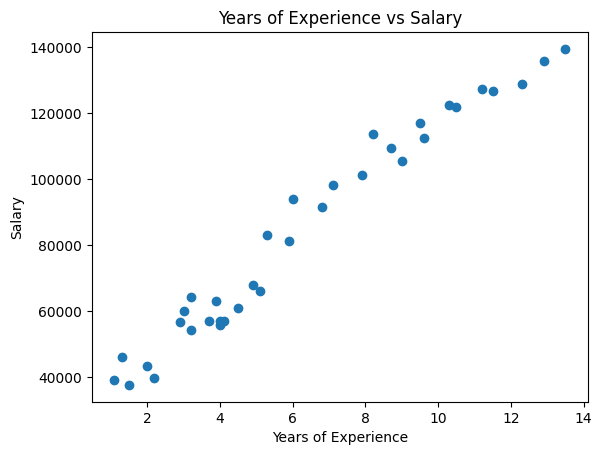

In [14]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.show()


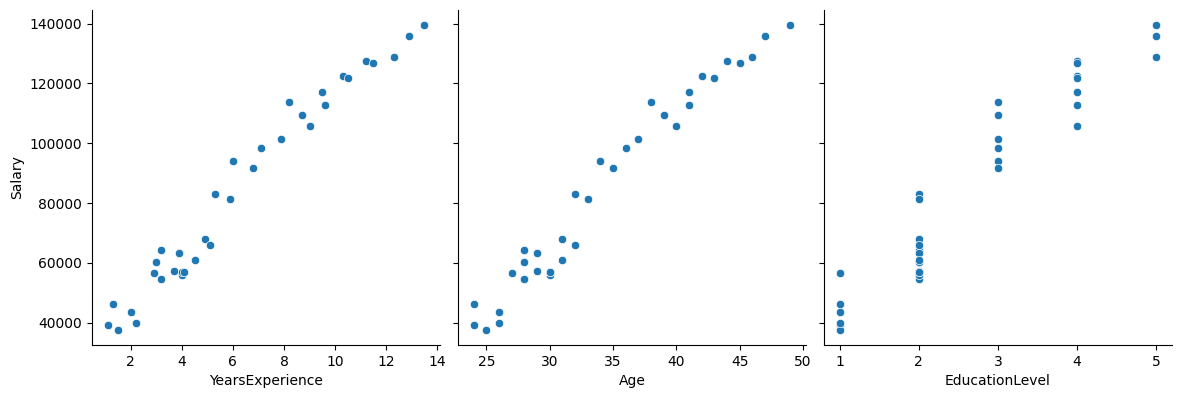

In [15]:
sns.pairplot(df, x_vars=['YearsExperience','Age','EducationLevel'], y_vars='Salary', height=4)
plt.show()

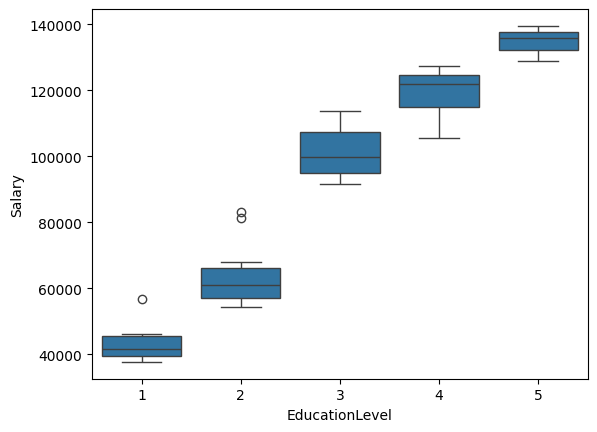

In [17]:
sns.boxplot(x='EducationLevel', y='Salary', data=df)
plt.show()

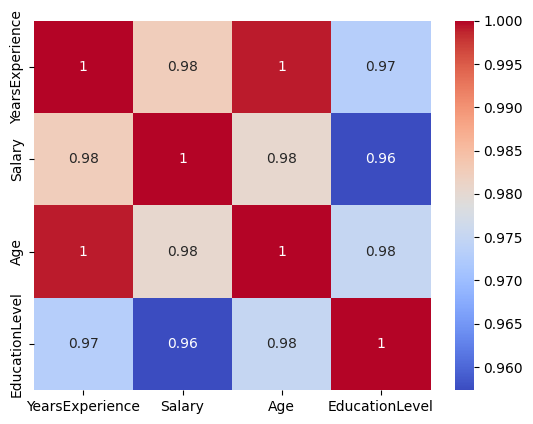

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

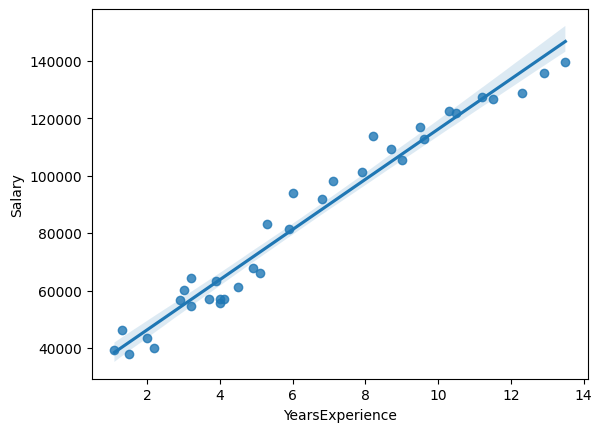

In [24]:
sns.regplot(x='YearsExperience', y='Salary', data=df)
plt.show()

In [25]:
X = df[['YearsExperience', 'Age', 'EducationLevel']]
y = df['Salary']

reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression()

In [26]:
print("Coefficients:", reg.coef_)   # Slopes for each feature
print("Intercept:", reg.intercept_) # Bias term

Coefficients: [15291.03158671 -3572.36887138  1745.95535729]
Intercept: 105323.00065955779


In [27]:
y_test = df.Salary
y_pred = reg.predict(X)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 4. R-Squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

In [29]:
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 4793.93
Mean Squared Error (MSE): 33936577.01
Root Mean Squared Error (RMSE): 5825.51
R-squared (R2): 0.9662


### Multiple Linear Regression Equation

For the given dataset:

- Intercept (β₀): **105323.0007**  
- Coefficients:  
  - β₁ (YearsExperience) = **15291.0316**  
  - β₂ (Age) = **-3572.3689**  
  - β₃ (EducationLevel) = **1745.9554**

The regression equation becomes:

$$
Salary = 105323.0007 + (15291.0316 \times YearsExperience) - (3572.3689 \times Age) + (1745.9554 \times EducationLevel)
$$
